# 1. Perkenalan.

Nama    : Alif Nurhadi <br>
Batch   : HCK-019 <br>

Objektif: Membuat model machine-learning klasifikasi untuk memprediksi apakah nasabah akan keluar atau memutuskan untuk tidak lagi menggunakan dari layanan bank dengan menkomparasi beberapa model dan juga dengan mempertimbangkan menggunakan metrik recall sebagai evaluasinya dengan alasan tidak dinginkannya kejadian dimana model salah memprediksi suatu keputusan dari seorang nasabah yang aktualnya dia keluar namun model memprediksi tetap, karna dengan itu nasabah akan kehilangan nasabahnya selain dari hilangnya jumlah nasabah, hal tersebut tidak termasuk jika nasabah tersebut adalah nasabah yang berjenis nasabah memiliki harta kekayaan yang tinggi.

## 1.1 Latar Belakang.

Pada era digital yang semakin berkembang, bank menghadapi tantangan besar dalam mempertahankan nasabah, terutama dengan banyaknya pilihan layanan keuangan yang tersedia. Kehilangan nasabah bukan hanya berdampak pada penurunan jumlah pengguna, tetapi juga berpotensi menurunkan reputasi bank, terutama jika nasabah yang keluar adalah mereka dengan aset yang signifikan. Dengan menggunakan model machine-learning, bank dapat memanfaatkan data historis nasabah untuk mengidentifikasi pola yang menunjukkan potensi churn. Oleh karena itu, sangat penting untuk memahami faktor-faktor yang memengaruhi keputusan nasabah untuk tetap atau pergi, sehingga bank dapat mengambil langkah-langkah yang tepat untuk mencegah hal tersebut dan mempertahankan hubungan yang berharga dengan para nasabahnya.


# 2. Data Libraries

In [1]:
# Reducing_unimportant_warnings.
import warnings
warnings.filterwarnings('ignore')

# Data_Manipulating Operations.
import numpy as np
import pandas as pd
import polars as pl

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# handling outlier
from feature_engine.outliers import Winsorizer

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, OrdinalEncoder

# Model_Pipelining
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# handling imbalance dataset.
from imblearn.over_sampling import SMOTENC

# Data_Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# mengurangi variance pada hasil model.
from sklearn.ensemble import BaggingClassifier

# Model Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# DIY Function
from Function import *

# crossvalidation operations.
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline as ImbPipeline

# Saving model
import pickle

# 3. Data Loading

| **Column**          | **Description**                                                                                          |
|---------------------|----------------------------------------------------------------------------------------------------------|
| RowNumber           | Berkorespondensi dengan nomor catatan (baris) dan tidak berpengaruh pada hasil.                         |
| CustomerId          | Berisi nilai acak dan tidak berpengaruh pada keputusan pelanggan untuk meninggalkan bank.               |
| Surname             | Nama belakang pelanggan tidak berdampak pada keputusan mereka untuk meninggalkan bank.                  |
| CreditScore         | Dapat mempengaruhi churn pelanggan; skor kredit yang lebih tinggi terkait dengan kemungkinan yang lebih rendah untuk meninggalkan. |
| Geography           | Lokasi pelanggan dapat mempengaruhi keputusan mereka untuk meninggalkan bank.                           |
| Gender              | Menarik untuk mengeksplorasi apakah gender memainkan peran dalam keputusan pelanggan untuk meninggalkan bank. |
| Age                 | Relevan; pelanggan yang lebih tua cenderung kurang mungkin meninggalkan bank dibandingkan yang lebih muda.|
| Tenure              | Mengacu pada jumlah tahun pelanggan telah menjadi klien; klien yang lebih lama biasanya lebih setia.    |
| Balance             | Indikator yang baik untuk churn pelanggan; orang dengan saldo yang lebih tinggi cenderung kurang mungkin meninggalkan. |
| NumOfProducts       | Mengacu pada jumlah produk yang dibeli pelanggan melalui bank.                                          |
| HasCrCard           | Menunjukkan apakah pelanggan memiliki kartu kredit; memiliki satu terkait dengan kemungkinan yang lebih rendah untuk meninggalkan. |
| IsActiveMember      | Pelanggan aktif cenderung kurang mungkin meninggalkan bank.                                              |
| EstimatedSalary     | Mirip dengan saldo; gaji yang lebih rendah terkait dengan kemungkinan yang lebih tinggi untuk meninggalkan. |
| Exited              | Menunjukkan apakah pelanggan meninggalkan bank.                                                          |
| Complain            | Menunjukkan apakah pelanggan telah mengajukan keluhan.                                                   |
| Satisfaction Score  | Skor yang diberikan oleh pelanggan untuk penyelesaian keluhan mereka.                                   |
| Card Type           | Jenis kartu yang dimiliki oleh pelanggan.                                                                |
| Points Earned       | Poin yang diperoleh pelanggan untuk menggunakan kartu kredit.                                            |


In [2]:
origin = pl.scan_csv("Dataset_milestone2.csv")
origin = origin.with_columns(
    [
        pl.exclude(['CustomerId','Surname','Geography','Gender','Balance','EstimatedSalary','Card Type']).cast(pl.Int32)
    ]
)

origin = origin.collect()
origin

CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
i64,str,i32,str,str,i32,i32,f64,i32,i32,i32,f64,i32,i32,i32,str,i32
15634602,"""Hargrave""",619,"""France""","""Female""",42,2,0.0,1,1,1,101348.88,1,1,2,"""DIAMOND""",464
15647311,"""Hill""",608,"""Spain""","""Female""",41,1,83807.86,1,0,1,112542.58,0,1,3,"""DIAMOND""",456
15619304,"""Onio""",502,"""France""","""Female""",42,8,159660.8,3,1,0,113931.57,1,1,3,"""DIAMOND""",377
15701354,"""Boni""",699,"""France""","""Female""",39,1,0.0,2,0,0,93826.63,0,0,5,"""GOLD""",350
15737888,"""Mitchell""",850,"""Spain""","""Female""",43,2,125510.82,1,1,1,79084.1,0,0,5,"""GOLD""",425
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
15606229,"""Obijiaku""",771,"""France""","""Male""",39,5,0.0,2,1,0,96270.64,0,0,1,"""DIAMOND""",300
15569892,"""Johnstone""",516,"""France""","""Male""",35,10,57369.61,1,1,1,101699.77,0,0,5,"""PLATINUM""",771
15584532,"""Liu""",709,"""France""","""Female""",36,7,0.0,1,0,1,42085.58,1,1,3,"""SILVER""",564


In [3]:
# melakukan pengecekan pada baris terduplikasi
origin.is_duplicated().sum()

0

In [4]:
# melakukan pengecekan nilai null/kosong pada keseluruhan kolom.
origin.is_empty()

False

## Insight :
Pada data tidak terdapat nilai terduplikasi dan nilai kosong, sehingga untuk langkah selanjutnya tidak diperlukan handle pada keseluruhan data

# 4. EDA

In [5]:
# menginisiasi data untuk dilakukan Exploratory Data Analysis
EDA_pl = origin.clone()
filter = EDA_pl.filter(pl.col('Age')>=17).drop('Complain').select(pl.exclude(['CustomerId','Surname']))
# filter.select(['Age','CreditScore','Point Earned']).to_series().hist(bin_count=3)

In [6]:
filter1 = filter.clone()

In [7]:
# menginisiasi data untuk dilakukan Exploratory Data Analysis
EDA = origin.to_pandas()
EDA.Exited.value_counts(normalize=True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

In [24]:
EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int32  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int32  
 6   Tenure              10000 non-null  int32  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int32  
 9   HasCrCard           10000 non-null  int32  
 10  IsActiveMember      10000 non-null  int32  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int32  
 13  Complain            10000 non-null  int32  
 14  Satisfaction Score  10000 non-null  int32  
 15  Card Type           10000 non-null  object 
 16  Point

In [8]:

### testing how similar 2 columns are
testing_howsimilar = EDA[['Exited','Complain']]
print(testing_howsimilar.duplicated().sum())



9996


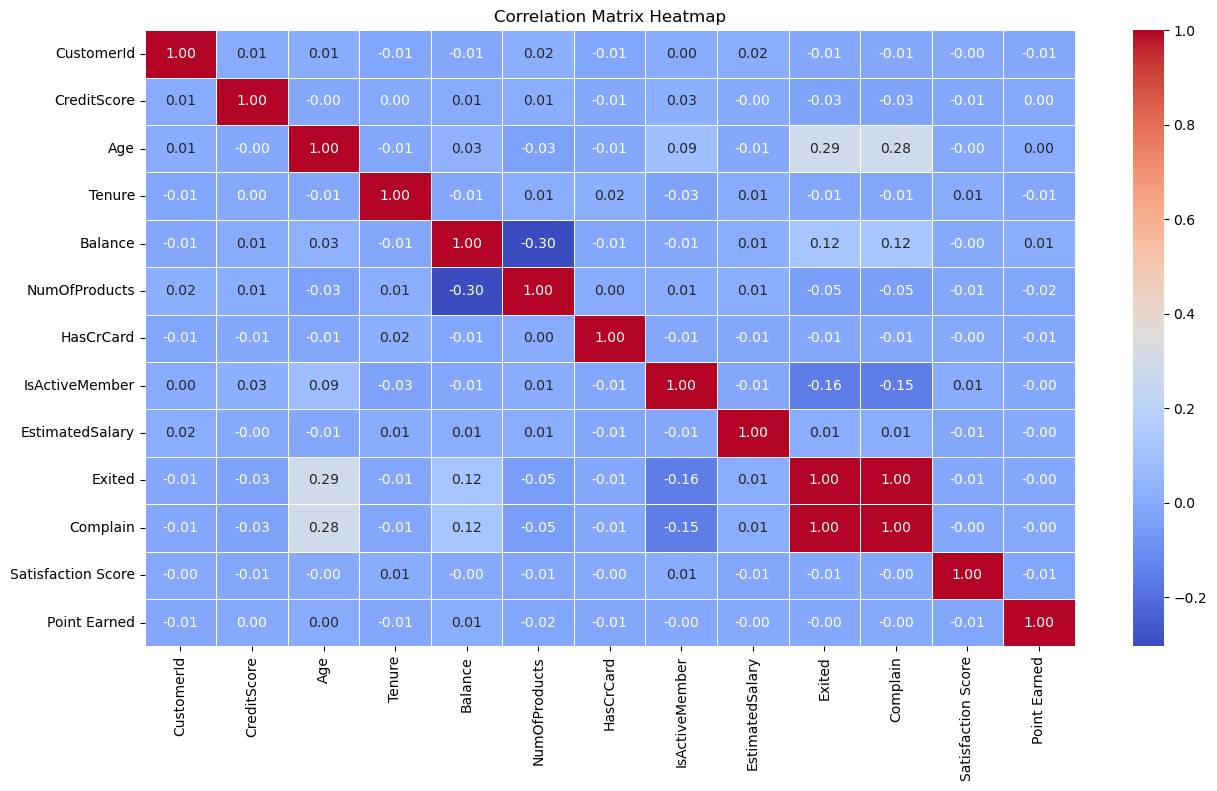

In [9]:

cek = EDA.select_dtypes(include=np.number)
corr_matrix = cek.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## insight:
Variabel komplain menunjukkan hubungan yang sangat kuat (hampir 100% linear) dengan variabel yang menandakan keluarnya nasabah dari layanan bank. Namun, variabel ini terlalu menyederhanakan situasi karena hanya memiliki dua nilai: "komplain" dan "tidak komplain".
Akibatnya, dalam konteks pembelajaran model, variabel ini berpotensi mendominasi hasil prediksi. Hal ini bisa menjadi masalah karena bisa mengurangi pengaruh variabel-variabel lain yang mungkin juga penting.
Variabel komplain mungkin akan lebih bermanfaat jika memiliki tingkatan atau kategori yang lebih terperinci. Misalnya, jika ada klasifikasi jenis atau tingkat keparahan komplain, variabel ini bisa memberikan informasi yang lebih bernuansa dan berharga untuk model prediksi.<br>

sehingga saat proses menuju modeling varibel ini tidak perlu digunakan.

## EDA 1

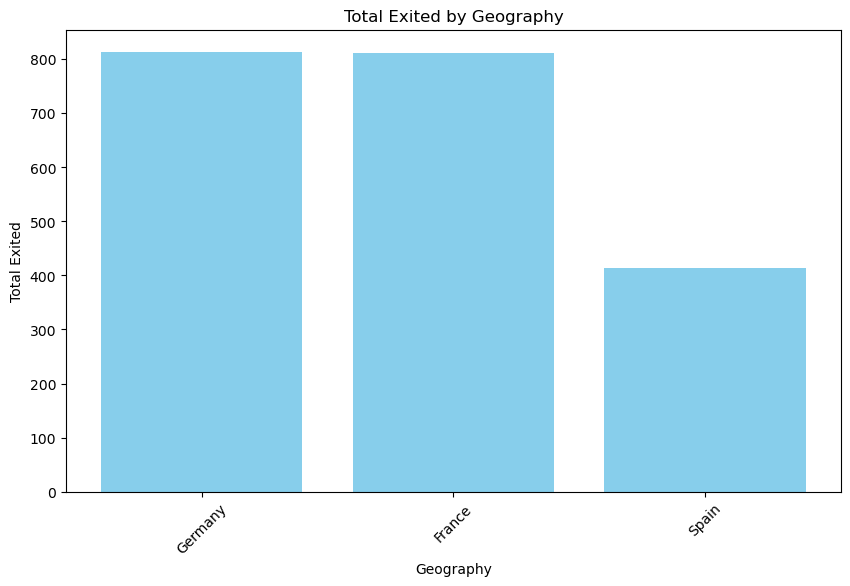

In [10]:
eda4 = filter.group_by('Geography').agg([pl.col('Exited').sum()]).sort('Exited',descending=True)
eda4_1 = eda4.to_pandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(eda4_1['Geography'], eda4_1['Exited'], color='skyblue')
plt.xlabel('Geography')
plt.ylabel('Total Exited')
plt.title('Total Exited by Geography')
plt.xticks(rotation=45)
plt.show()

In [11]:
# eda5 = filter1.filter((pl.col('Exited')==1)).select(pl.exclude(['Geography','Exited']))
# eda5_1 = filter1.filter((pl.col('Exited')==0)).select(pl.exclude(['Geography','Exited']))

In [12]:
eda5 = filter1.filter((pl.col('Exited')==1)).select(pl.exclude('Exited'))
eda5_1 = filter1.filter((pl.col('Exited')==0)).select(pl.exclude('Exited'))

In [13]:
eda5.select(pl.col(['Age' , 'Balance' , 'NumOfProducts' , 'IsActiveMember' ])).describe()

statistic,Age,Balance,NumOfProducts,IsActiveMember
str,f64,f64,f64,f64
"""count""",2038.0,2038.0,2038.0,2038.0
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",44.835623,91109.476006,1.475466,0.360648
"""std""",9.759754,58346.483197,0.801408,0.480306
"""min""",18.0,0.0,1.0,0.0
"""25%""",38.0,38340.02,1.0,0.0
"""50%""",45.0,109349.29,1.0,0.0
"""75%""",51.0,131433.33,2.0,1.0
"""max""",84.0,250898.09,4.0,1.0


### Insight 1 : 
TL:DR<br>
Umur nasabah yang memutuskan untuk berhenti menggunakan layanan bank berada direntan umur yang senior,dengan rata-rata  umurnya adalah 45 tahun dan tidak aktif sebagai member dari bank

In [14]:
eda5_1.select(pl.col(['Age' , 'Balance' , 'NumOfProducts' , 'IsActiveMember' ])).describe()

statistic,Age,Balance,NumOfProducts,IsActiveMember
str,f64,f64,f64,f64
"""count""",7962.0,7962.0,7962.0,7962.0
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",37.408063,72742.750663,1.54421,0.554635
"""std""",10.125957,62851.577108,0.509542,0.497037
"""min""",18.0,0.0,1.0,0.0
"""25%""",31.0,0.0,1.0,0.0
"""50%""",36.0,92072.68,2.0,1.0
"""75%""",41.0,126428.38,2.0,1.0
"""max""",92.0,221532.8,3.0,1.0


### Insight 2 :
TL:DR <br>
Umur nasabah yang memutuskan untuk berhenti menggunakan layanan bank berada direntan umur yang cukup muda,dengan rata-rata  umurnya adalah 37 tahun dan nasabah tersebut aktif sebagai member dari bank'

## EDA 2

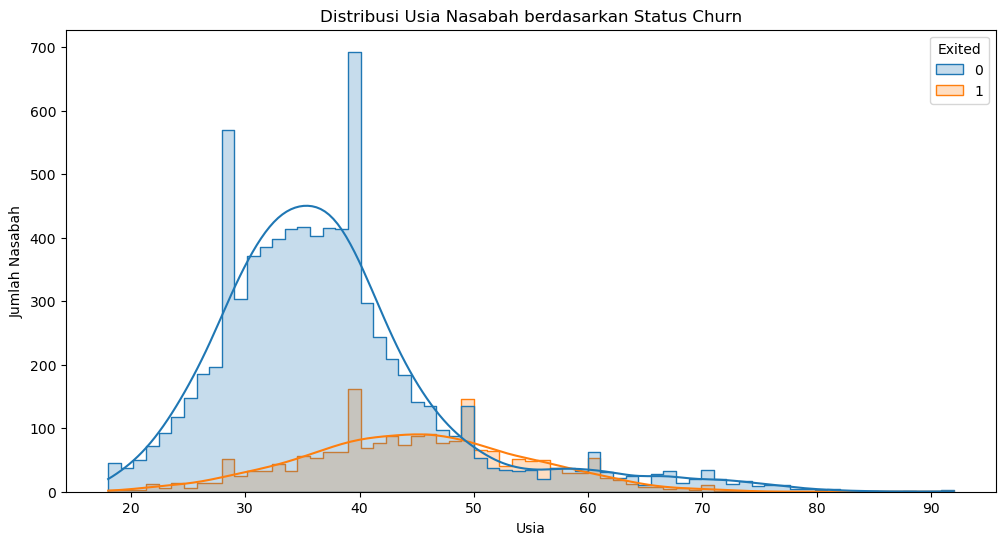

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=EDA, x='Age', hue='Exited', kde=True, element='step')
plt.title('Distribusi Usia Nasabah berdasarkan Status Churn')
plt.xlabel('Usia')
plt.ylabel('Jumlah Nasabah')
plt.show()

### Insight :
menurut jumlah nasabah yang bertahan dengan layanan bank lebih banyak dari yang memutuskan untuk keluar dari layanan bank dan hal tersebut menunjukkan bahwa pertanda baik untuk bank tersebut, namun jumlah nasabah yang memutuskan untuk keluar jika dilihat proporsi dari keseluruhan yaitu 20% dari keseluruhan data adalah hal yang perlu ditangani yaitu dengan menurunkannya, yang mana pada konteks ini hal yang perlu diperhatikannya adalah direntan umur 40 hingga 50 tahun. Hal yang memungkinkan untuk dilakukan penanganan seperti mencoba memberikan pendekatan-pendekatan yang membuat kelompok umur tersebut seperti (keluarga) merasa bagian dari bank tersebut sehingga mereka menjadi merasa tidak perlu untuk meninggalkan layanan bank tersebut.

## EDA 3

In [16]:
eda3= EDA.query('Exited == 1')
eda3_1= EDA.query('Exited == 0')

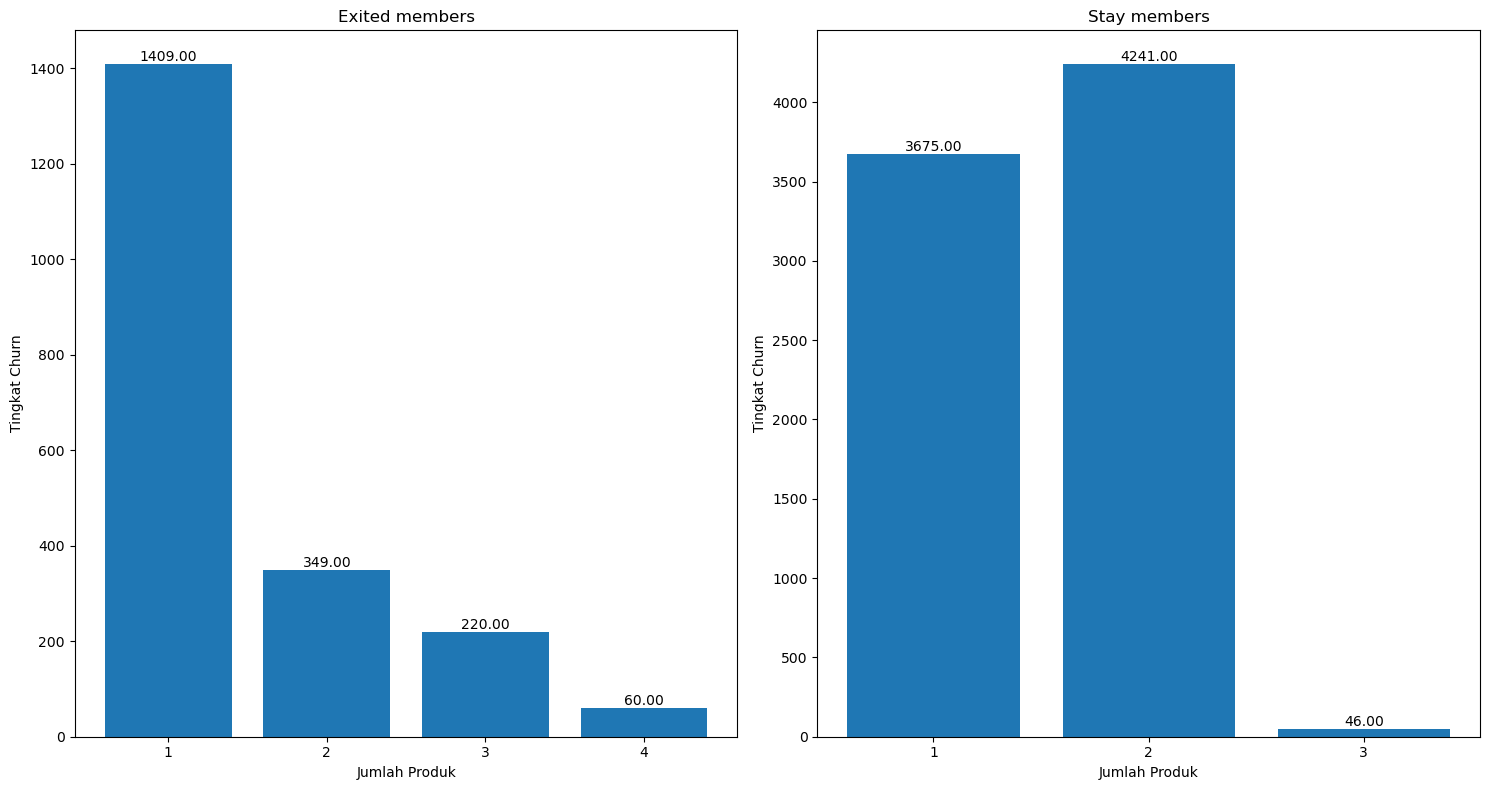

In [17]:
product_churn = eda3.groupby('NumOfProducts')['Exited'].count().reset_index()
product_churn1 = eda3_1.groupby('NumOfProducts')['Exited'].count().reset_index()

fig, ( ax1,ax2) = plt.subplots(1,2, figsize =(15,8))
# plt.figure(figsize=(10, 6))
ax1.bar(product_churn['NumOfProducts'], product_churn['Exited'])

ax1.set_title('Exited members')
ax1.set_xlabel('Jumlah Produk')
ax1.set_ylabel('Tingkat Churn')

# Ensure x-axis shows integer values
ax1.set_xticks(product_churn['NumOfProducts'])

# Add value labels on top of each bar
for i, v in enumerate(product_churn['Exited']):
    ax1.text(product_churn['NumOfProducts'][i], v, f'{v:.2f}', ha='center', va='bottom')

ax2.bar(product_churn1['NumOfProducts'], product_churn1['Exited'])

ax2.set_title('Stay members')
ax2.set_xlabel('Jumlah Produk')
ax2.set_ylabel('Tingkat Churn')

# Ensure x-axis shows integer values
ax2.set_xticks(product_churn1['NumOfProducts'])

# Add value labels on top of each bar
for i, v in enumerate(product_churn1['Exited']):
    ax2.text(product_churn1['NumOfProducts'][i], v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

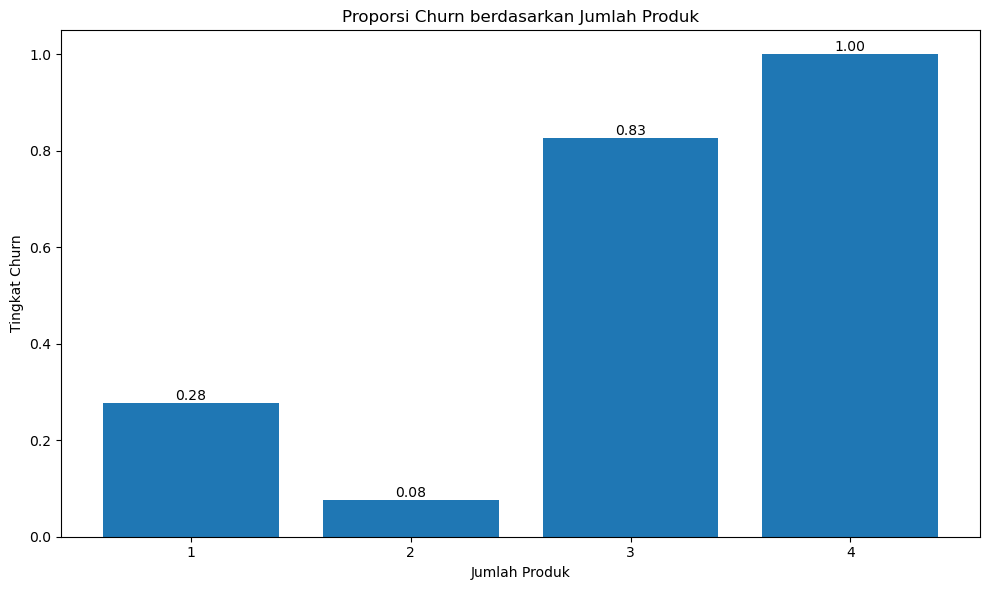

In [18]:
product_churn = EDA.groupby('NumOfProducts')['Exited'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(product_churn['NumOfProducts'], product_churn['Exited'])

plt.title('Proporsi Churn berdasarkan Jumlah Produk')
plt.xlabel('Jumlah Produk')
plt.ylabel('Tingkat Churn')

# Ensure x-axis shows integer values
plt.xticks(product_churn['NumOfProducts'])

# Add value labels on top of each bar
for i, v in enumerate(product_churn['Exited']):
    plt.text(product_churn['NumOfProducts'][i], v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Insight :
semakin tinggi jumlah produk bank yang digun akan oleh nasabah kemungkinan nasabah tersebut akan memutuskan tiggal juga meningkat. hal tersebut bisa diindikasikan nasabah tersebut tidak bisa memenuhi kewajiban dari setiap produk yang digunakannya. Sehingga apabila nasabah menginginkan menambah produk dari layanan bank yang ingin mereka gunakan, bank perlu melakukan ricek lebih lanjut pada nasabah tersebut dalam bentuk apapun misalnya seperti peringatan awal bahwa "nasabah tersebut belum memiliki cukup persiapan untuk melakukan penambahan layanan produk" sehingga bisa meminimalisasi kehilangan nasabah dikemudian hari.<br>

jumlah produk yang oke atau optimal untuk mempertahankan nasabah yang sudah mengguanakn layanan perbankan adalah orang yang memiliki jumlah card sebanyak 2 kartu untuk 1 orang. <br>

## EDA 4

In [19]:
tenure = EDA.groupby('Exited')['Tenure'].value_counts().unstack().fillna(0)
tenure

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,318,803,847,796,786,803,771,851,828,770,389
1,95,232,201,213,203,209,196,177,197,214,101


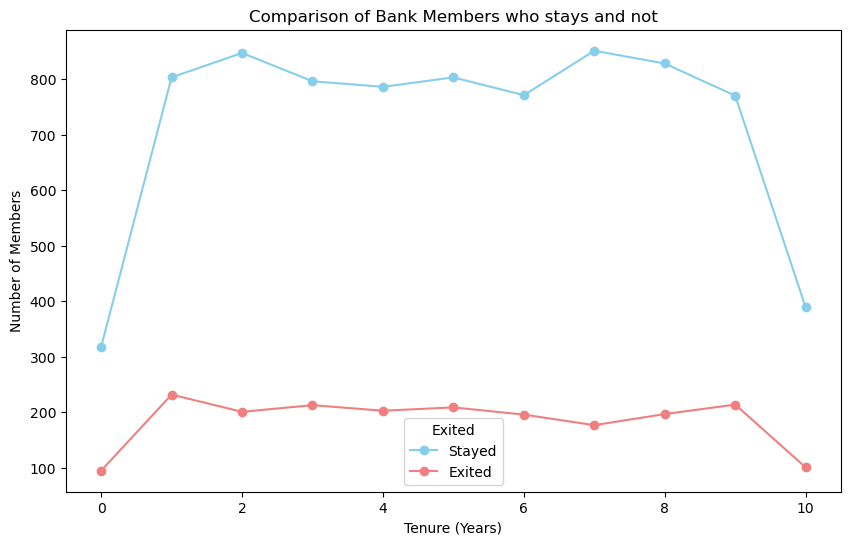

In [20]:
# Plotting the line chart with markers
plt.figure(figsize=(10, 6))
plt.plot(tenure.columns, tenure.loc[0], marker='o', linestyle='-', color='skyblue', label='Stayed')
plt.plot(tenure.columns, tenure.loc[1], marker='o', linestyle='-', color='lightcoral', label='Exited')

# Adding labels, title, and legend
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Members')
plt.title('Comparison of Bank Members who stays and not')
plt.legend(title='Exited')

# Displaying the chart
plt.show()

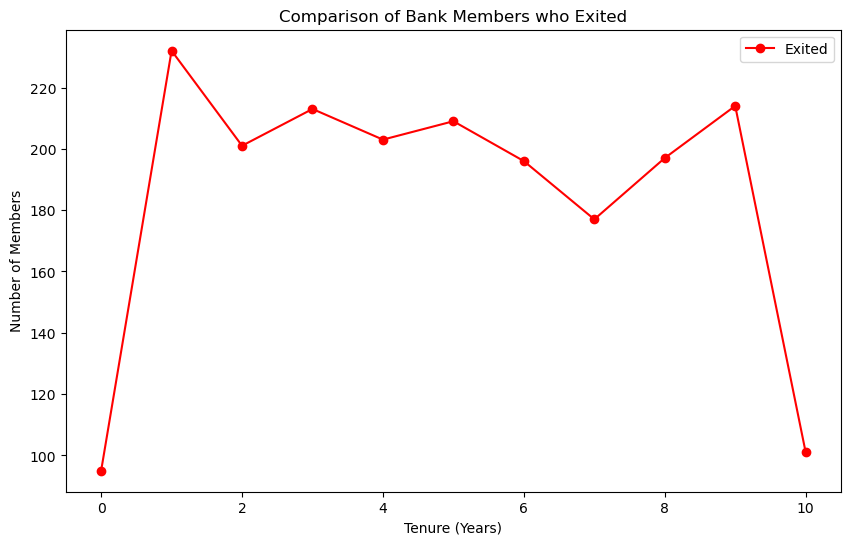

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(tenure.columns, tenure.loc[1], marker='o', linestyle='-', color='red', label='Exited')

# Adding labels, title, and legend
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Members')
plt.title('Comparison of Bank Members who Exited')
plt.legend()

# Displaying the chart
plt.show()

### Insight :
Untuk pelanggan baru (tenure 0), tingkat churn tinggi mungkin menunjukkan masalah dalam onboarding atau pengalaman awal. Retensi meningkat hingga 3-4 tahun tenure, namun churn tertinggi terjadi pada 1-2 tahun, menunjukkan periode kritis. Pelanggan jangka panjang (tenure 8-10) menunjukkan loyalitas tinggi, meski jumlahnya lebih sedikit. Fokus perlu diberikan pada pengurangan churn awal dan mengubah pelanggan jangka menengah menjadi loyal.<br>

Tanda positif: retensi baik setelah tahun-tahun awal dan loyalitas kuat di pelanggan jangka panjang.<br>

## EDA 5

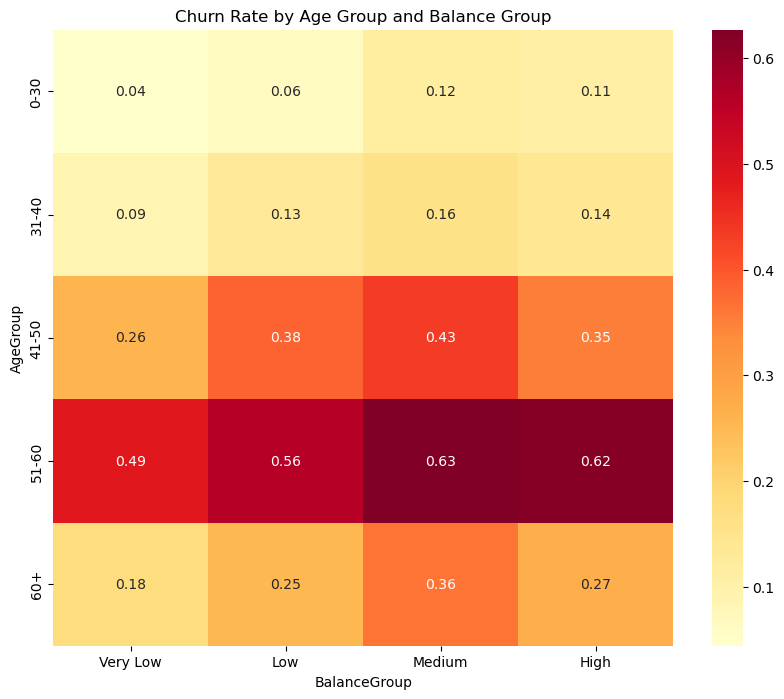

In [21]:
EDA['AgeGroup'] = pd.cut(EDA['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '31-40', '41-50', '51-60', '60+'])

# Create BalanceGroup with dynamic labels based on actual bins created
balance_bins = pd.qcut(EDA['Balance'], q=5, duplicates='drop')

# Create labels dynamically based on the number of unique bins
balance_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'][:balance_bins.cat.categories.size]

EDA['BalanceGroup'] = pd.qcut(EDA['Balance'], q=5, labels=balance_labels, duplicates='drop')

# Now create the heatmap
age_balance_churn = EDA.groupby(['AgeGroup', 'BalanceGroup'])['Exited'].mean().unstack()

plt.figure(figsize=(10, 8))
sns.heatmap(age_balance_churn, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Churn Rate by Age Group and Balance Group')
plt.show()

### Insight :
Berdasarkan visualisasinya yang mengambarkan tingkat churn atau tingkat pelanggan yang berhenti berlangganan berdasarkan kelompok usia dan kelompok saldo rekening. Warna pada peta panas ini bervariasi dari kuning muda hingga merah tua, di mana warna yang lebih gelap menandakan tingkat churn yang lebih tinggi. Angka di dalam setiap sel menunjukkan persentase churn yang tepat untuk kombinasi kelompok usia dan saldo tertentu. Kelompok usia dibagi menjadi lima kategori: 0-30, 31-40, 41-50, 51-60, dan 60+ tahun. Sementara itu, saldo rekening dikelompokkan menjadi empat kategori dari "Very Low" (Sangat Rendah) hingga "High" (Tinggi). Terlihat bahwa tingkat churn tertinggi (0,63 atau 63%) terjadi pada kelompok usia 51-60 tahun dengan saldo rekening "Medium" (Menengah), sedangkan tingkat churn terendah (0,04 atau 4%) terdapat pada kelompok usia 0-30 tahun dengan saldo rekening "Very Low" (Sangat Rendah).


## EDA 6

In [22]:
active_churn = EDA[EDA['IsActiveMember'] == 1]['Exited'].mean()
inactive_churn = EDA[EDA['IsActiveMember'] == 0]['Exited'].mean()
print(f"\nChurn rate for active members: {active_churn:.2%}")
print(f"Churn rate for inactive members: {inactive_churn:.2%}")


Churn rate for active members: 14.27%
Churn rate for inactive members: 26.87%


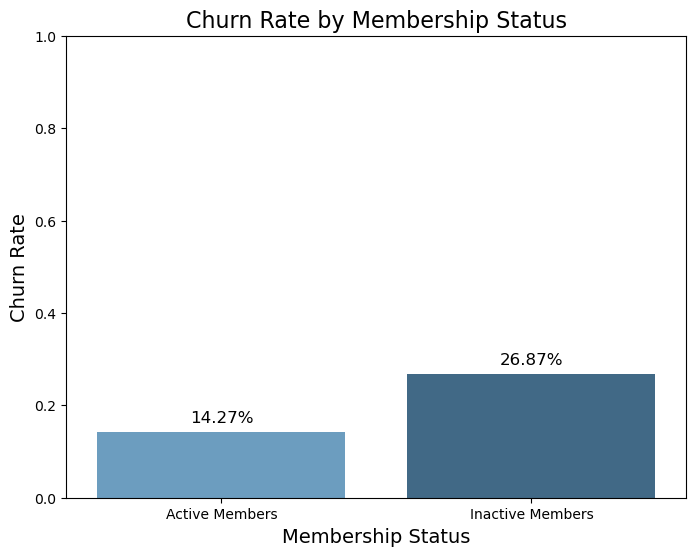

In [23]:
categories = ['Active Members', 'Inactive Members']
churn_rates = [active_churn, inactive_churn]

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=churn_rates, palette='Blues_d')

# Adding title and labels
plt.title('Churn Rate by Membership Status', fontsize=16)
plt.ylabel('Churn Rate', fontsize=14)
plt.xlabel('Membership Status', fontsize=14)
plt.ylim(0, 1)

# Annotate the bars with the churn rates
for i in range(len(categories)):
    plt.text(i, churn_rates[i] + 0.02, f"{churn_rates[i]:.2%}", ha='center', fontsize=12)

plt.show()

### Insight :
Tingkat churn untuk anggota yang tidak aktif (26,87%) hampir dua kali lipat dibandingkan dengan anggota yang aktif (14,27%). Perbedaan signifikan ini menyoroti pentingnya keterlibatan pelanggan dalam retensi. Hal tersebut bisa diselesaikan seharusnya dengan meningkatkan aktivitas dan keterlibatan anggota bisa menjadi strategi yang kuat untuk mengurangi churn. <br>

Bank harus fokus pada:<br>
- Mengembangkan program untuk mengaktifkan kembali anggota yang tidak aktif.
- Menyelidiki alasan mengapa anggota menjadi tidak aktif.
- Menciptakan insentif untuk aktivitas akun yang teratur.
- Meningkatkan pengalaman pelanggan secara keseluruhan untuk mendorong partisipasi aktif.

## EDA 7

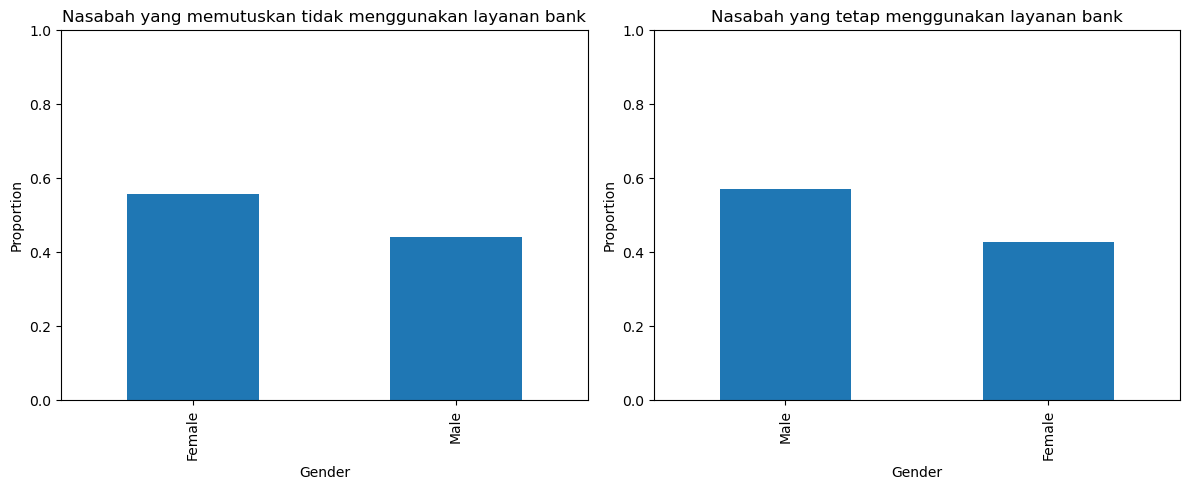

In [24]:
churned_gender_dist = EDA[EDA['Exited'] == 1]['Gender'].value_counts(normalize=True)
retained_gender_dist = EDA[EDA['Exited'] == 0]['Gender'].value_counts(normalize=True)

# Create a bar plot to visualize the distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
churned_gender_dist.plot(kind='bar', ax=ax1, title='Nasabah yang memutuskan tidak menggunakan layanan bank')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 1)

retained_gender_dist.plot(kind='bar', ax=ax2, title='Nasabah yang tetap menggunakan layanan bank')
ax2.set_ylabel('Proportion')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()

### Insight :
Ada perbedaan yang mencolok dalam tingkat churn berdasarkan gender. Sekitar 60% pelanggan yang memutuskan untuk melepas layanan dengan bank adalah perempuan, sedangkan 60% pelanggan yang tetap adalah laki-laki. Ketidakseimbangan gender dalam tingkat churn ini perlu diperhatikan:<br>

- Melakukan riset untuk memahami mengapa pelanggan perempuan lebih mungkin untuk pergi
- Mengembangkan strategi retensi yang ditargetkan untuk pelanggan perempuan
- Menganalisis penggunaan produk dan tingkat kepuasan berdasarkan gender
- Mempertimbangkan untuk menciptakan atau memodifikasi produk/jasa untuk lebih memenuhi kebutuhan pelanggan perempuan
- Memeriksa apakah ada bias tidak disengaja dalam pemasaran, layanan pelanggan, atau penawaran produk yang mungkin berdampak negatif pada pelanggan perempuan

# 5. Feature Engineering

In [25]:
origin_pd = origin.to_pandas()

Cek data terduplikasi

In [26]:
origin_pd[origin_pd.duplicated(keep=False)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


## 5.1 Data Spliting

In [27]:
origin_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int32  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int32  
 6   Tenure              10000 non-null  int32  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int32  
 9   HasCrCard           10000 non-null  int32  
 10  IsActiveMember      10000 non-null  int32  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int32  
 13  Complain            10000 non-null  int32  
 14  Satisfaction Score  10000 non-null  int32  
 15  Card Type           10000 non-null  object 
 16  Point

### 5.1.1 Memisahkan Fitur-Target & Train-Test data

In [28]:
# Fitur - Target
fitur_alt = origin_pd.drop((['Complain','Exited','CustomerId','Surname']),axis=1)
target_alt = origin_pd['Exited']

#### Insight :
Pada proses EDA variabel complain mendominasi korelasi dengan target dibandingkan dengan korelasi variabel lainnya dengan target, lalu nilai yang terdapat pada variabel complain bentuknya terlalu luas untuk dijadikan sebuah parameter yang akan dihubungkan pada korelasi apakah nasabah suatu bank akan tidak lagi menggunakan produk dari bank tersebut atau tidak. Berdasarkan hal tersebut untuk variabel complain tidak akan digunakan pada proses latihan model machine learning.

In [29]:
# melakukan splitting data untuk proses training dan pengujian hasil dengan test set.
x_train,x_test,y_train,y_test= train_test_split(fitur_alt,target_alt,random_state=42,test_size=0.21,stratify=target_alt)

In [30]:
# melakukan pengecekan pada proporsi kelas pada target.
y_train.value_counts()

Exited
0    6290
1    1610
Name: count, dtype: int64

In [31]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7900 entries, 2379 to 4624
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         7900 non-null   int32  
 1   Geography           7900 non-null   object 
 2   Gender              7900 non-null   object 
 3   Age                 7900 non-null   int32  
 4   Tenure              7900 non-null   int32  
 5   Balance             7900 non-null   float64
 6   NumOfProducts       7900 non-null   int32  
 7   HasCrCard           7900 non-null   int32  
 8   IsActiveMember      7900 non-null   int32  
 9   EstimatedSalary     7900 non-null   float64
 10  Satisfaction Score  7900 non-null   int32  
 11  Card Type           7900 non-null   object 
 12  Point Earned        7900 non-null   int32  
dtypes: float64(2), int32(8), object(3)
memory usage: 617.2+ KB


#### Insight :
kondisi data imbalance pada kolom target prediksi yang ingin dilakukan modeling, perlu dihandle dengan SMOTE/SMOTENC

In [32]:
# mereset ulang index setelah proses spliting agar kembali seperti normal.
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [33]:
# menentukan random index yang akan dipakai untuk sebagai data inference
indexfordrop = [3,1998,259,24,70]

# melakukan pengambilan data inference berdasarkan nomer indexnya dan menyimpannya kedalam bentuk csv baru.
data_inf = x_train.iloc[indexfordrop]
# data_inf.to_csv('data_inf.csv')
data_inf



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned
3,675,France,Female,57,8,0.00,2,0,1,95463.29,3,SILVER,632
1998,746,Spain,Female,25,3,104833.79,1,0,0,71911.30,2,PLATINUM,367
259,644,France,Male,33,8,0.00,2,1,1,155294.17,5,SILVER,813
24,580,Germany,Male,24,1,133811.78,1,1,0,17185.95,2,DIAMOND,500
70,593,France,Male,36,2,70181.48,2,1,0,80608.12,3,PLATINUM,273


In [34]:
# karena beberapa barisnya digunakan sebagai data inference maka barus pada yang akan gunakan pada proses selajutnya akan berkurang sebanyak data yang akan data inference yang diambil
x_train.drop(index=indexfordrop,inplace=True)
x_test.drop(index=indexfordrop,inplace=True)
y_train.drop(index=indexfordrop,inplace=True)
y_test.drop(index=indexfordrop,inplace=True)

# mereset ulang index setelah drop agar kembali seperti normal.
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)


In [35]:
smotenc = SMOTENC([1,2,11],random_state=42)
x_train,y_train = smotenc.fit_resample(x_train,y_train)
y_train.value_counts()

Exited
0    6286
1    6286
Name: count, dtype: int64

### 5.1.2 Memisahkan kolom berdasarkan jenisnya.

In [36]:
# make list of columns base on type.
numeric_col = origin_pd[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']].columns.tolist()
nominal_col = ["IsActiveMember","HasCrCard","NumOfProducts"]
needhandle_nominal = ["Gender","Geography"]
ordinal_col = ['Satisfaction Score']
needhandle_ordinal = ['Card Type']

testingfunction = ["Gender","Geography",'Card Type']

## 5.2 Handling NaN

In [37]:
fitur_alt[fitur_alt.isnull().any(axis=1)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned


### 5.2.1 Insight :
tidak ada data kosong yang perlu untuk dilakukan handling.

## 5.3 Handling Outlier

In [38]:
help_handling_outlier()

 ================|| do from feature_engine.outliers import Winsorizer at the very top ||================||
    winsoriser = Winsorizer(capping_method='iqr', # for normal dist, type 'gaussian': if still outlier out there put quantiles.
                            tail='both',
                            fold=       #3 for normal dist; 1.5 for moderate skew and 3 for extreme; 0.1 for quantiles.
                            variables= #[list of outlier columns that need to be handle],
                            missing_values='ignore')
    
    X_train_capped = winsoriser.fit_transform(X_train) # when using unsupervised only this line is needed.
    X_test_capped = winsoriser.transform(X_test)

    return X_train_capped, X_test_capped  when doing unsupervised, the return variable value is only one( which is the whole data )


### insight :
akan lakukan handling outlier pada kolom credit score dan age dengan menggunakan metode winsorizer yang akan melakukan pembatasan nilai teratas dan terbawah dengan alasan agar model machine learning yang akan digunakan dapat mempelajari data kita dengan lebih baik.

In [39]:
DistributionCheck(x_train,*numeric_col)

,Nama-kolom,Nilai-Skewness,Status,Nilai-outlier
0,CreditScore,-0.085697,Normal,"[367, 350, 363, 365, 358, 373, 359, 357, 368, ..."
1,Age,0.593847,Moderate,"[71, 73, 72, 67, 69, 74, 78, 68, 70, 76, 84, 9..."
2,Tenure,0.070904,Normal,[]
3,Balance,-0.293003,Normal,[]
4,EstimatedSalary,-0.008207,Normal,[]
5,Point Earned,0.032958,Normal,[]


In [40]:
winsoriser = Winsorizer(capping_method='gaussian', 
                            tail='both',
                            fold= 2.0 ,      
                            variables='CreditScore', 
                            missing_values='ignore')
    
capp_x_train = winsoriser.fit_transform(x_train)
capp_x_test = winsoriser.transform(x_test)

In [41]:
DistributionCheck(capp_x_train,*numeric_col)

,Nama-kolom,Nilai-Skewness,Status,Nilai-outlier
0,CreditScore,-0.018504,Normal,[]
1,Age,0.593847,Moderate,"[71, 73, 72, 67, 69, 74, 78, 68, 70, 76, 84, 9..."
2,Tenure,0.070904,Normal,[]
3,Balance,-0.293003,Normal,[]
4,EstimatedSalary,-0.008207,Normal,[]
5,Point Earned,0.032958,Normal,[]


In [42]:
winsoriser = Winsorizer(capping_method='iqr', 
                            tail='both',
                            fold= 1.5 ,      
                            variables='Age', 
                            missing_values='ignore')
    
capp_x_train = winsoriser.fit_transform(capp_x_train)
capp_x_test = winsoriser.transform(capp_x_test)

In [43]:
DistributionCheck(capp_x_train,*numeric_col)

,Nama-kolom,Nilai-Skewness,Status,Nilai-outlier
0,CreditScore,-0.018504,Normal,[]
1,Age,0.412890,Normal,[]
2,Tenure,0.070904,Normal,[]
3,Balance,-0.293003,Normal,[]
4,EstimatedSalary,-0.008207,Normal,[]
5,Point Earned,0.032958,Normal,[]


### insight :
setelah dilakukan sensoring atau pembatasan pada rentan nilainya, keseluruhan data numerik distribusinya menjadi normal, walau proses capping ini tetap membutuhkan persetujuan dari pemilik data,  karena sebagai data scientist mau bagaimana pun data outlier  tetap penting bagi perusahaan maka jika tidak diperbolehkan biasanya akan dilakukan pemisahan nilai outlier pada tabel baru dan menghapusnya pada data yang ingin dilakukan modeling.

# 5.4. Feature selection (Feature Importance)

Terlalu banyak varibel pada fitur sebuah model tidak memastikan hasilnya akan bagus, maka dengan itu dilakukan perhitungan kolom fitur mana yang memiliki korelasi dengan target sehingga model dapat mengenali dan mempelajari data yang dimiliki dengan lebih baik.

In [44]:
capp_x_train.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned
2726,757.0,France,Female,44.0,4,123322.150000,1,1,0,137136.290000,2,GOLD,521
9867,657.0,France,Female,44.0,8,23511.178303,1,0,1,169860.836470,4,DIAMOND,283
11459,489.0,Germany,Female,35.0,7,112110.309445,1,0,0,197075.889489,2,SILVER,791


## 5.4.1 Mengkomparasi feature importance dengan model yang berbeda

In [45]:
# memasitkan bahwa seluruh kolom selain user name dan id sudah ter=encode dengan baik

testing = capp_x_train.copy()
the_order = ['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']
enc_fitur_alt = encode_categorical(testing,'Card Type',the_order)

In [46]:
# mendefiniskan model
model_1 = XGBClassifier()
model_2 = RandomForestClassifier(random_state=42)

### feature importance 1

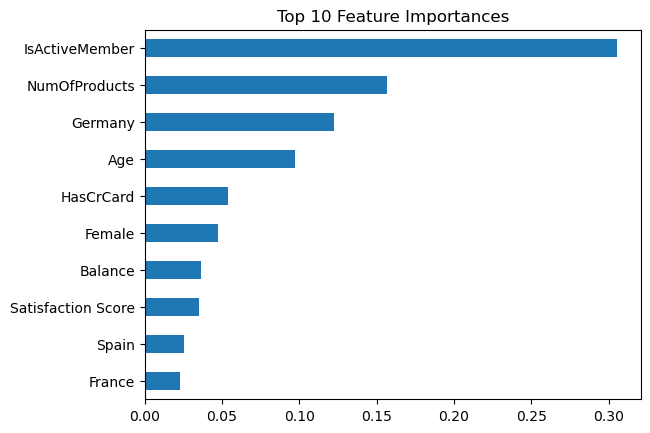

In [47]:
vis_FeatureImportance(model_1,enc_fitur_alt,y_train,needhandle_nominal)

TLDR :

hanya ada 9 kolom yang akan terpilih jika ingin prediksi powernya model mencapai 90%

### feature importance 2

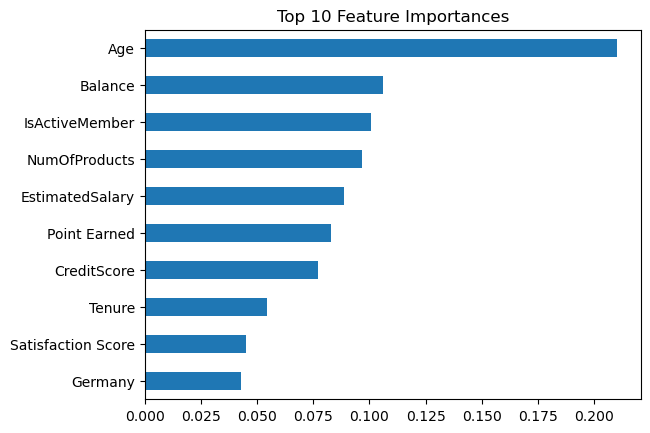

In [48]:
vis_FeatureImportance(model_2,enc_fitur_alt,y_train,needhandle_nominal)

TLDR :

hanya ada 9 kolom yang akan terpilih jika ingin prediksi powernya model mencapai 90%

In [49]:
def FeatureImportance_rank (model, df1:pd.DataFrame, df2:pd.DataFrame, args:list=None, treshold:float = 0.90):
    ''' USED THIS TO A SUPERVISED LEARNING ONLY

        model = tree-base function that will be used
        \n df1 = xtrain data
        \n df2 = ytrain data that already encoded
        \n * args = list of xtrain columns that need to be one hot encoded if already encoded just put None inside the argument 
        \n IF THERES A CATEGORICAL COLUMNS, IT NEED TO BE ENCODED OUTSIDE THIS AND BEFORE USING THIS!!!
        '''
    
    if args is not None:
        X_train_ohe = pd.get_dummies(df1, prefix='', prefix_sep='', columns=args,) # its a column that need to be encoded
    else :
        X_train_ohe = df1.copy()

    y_train_ohe = df2.copy()
    model.fit(X_train_ohe, y_train_ohe)

    feat_importances = pd.Series(model.feature_importances_, index=X_train_ohe.columns)
    feat_importances = feat_importances.sort_values(ascending=False)
    cumulative_importance = feat_importances.cumsum()
    return cumulative_importance[cumulative_importance <= treshold]

    

In [50]:
def FeatureImportance_rank_based (model, df1:pd.DataFrame, df2:pd.DataFrame, args:list=None, treshold:float = 0.90):
    ''' USED THIS TO A SUPERVISED LEARNING ONLY

        model = tree-base function that will be used
        \n df1 = xtrain data
        \n df2 = ytrain data that already encoded
        \n * args = list of xtrain columns that need to be one hot encoded if already encoded just put None inside the argument 
        \n IF THERES A CATEGORICAL COLUMNS, IT NEED TO BE ENCODED OUTSIDE THIS AND BEFORE USING THIS!!!
        '''
    
    X_train_processed = df1.copy()
    
    if args is not None:
        encoder = OrdinalEncoder()
        X_train_processed[args] = encoder.fit_transform(df1[args])
        
    y_train_ohe = df2.copy()
    model.fit(X_train_processed, y_train_ohe)

    feat_importances = pd.Series(model.feature_importances_, index=X_train_processed.columns)
    feat_importances = feat_importances.sort_values(ascending=False)
    cumulative_importance = feat_importances.cumsum()

    return cumulative_importance[cumulative_importance <= treshold]

    

### menghitung feature importance yang mencakup 90% confidence hasil prediksi

In [51]:
best_feature = FeatureImportance_rank(model_2,enc_fitur_alt,y_train,needhandle_nominal).keys().tolist()

In [52]:
print(len(best_feature))
print(best_feature)

9
['Age', 'Balance', 'IsActiveMember', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'CreditScore', 'Tenure', 'Satisfaction Score']


In [53]:
testfunc = FeatureImportance_rank_based(model_2,capp_x_train,y_train,testingfunction).keys().tolist()
print(len(testfunc))
print(testfunc)

9
['Age', 'NumOfProducts', 'Balance', 'IsActiveMember', 'EstimatedSalary', 'Point Earned', 'CreditScore', 'Tenure', 'Satisfaction Score']


### Insight :
menurut perhitungan feature importance menggunakan randomforestclassifier kolom atau variabel yang menyumbang secara kumulatif berkontribusi dalam memastikan model dapat mempengaruhi model untuk memprediksi suatu data dan memprediksi data baru.

In [54]:
origin_pd

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


Berdasarkan hasil perhitungan featureimportancenya feature yang jika nilai kumulatifnya digabung dan mencakup 90% kuatnya prediksi adalah 9 kolom berikut dari 17 kolom yang ada ; 
> ['Age','Balance','IsActiveMember','NumOfProducts','EstimatedSalary','Point Earned','CreditScore','Tenure','Satisfaction Score']

In [55]:
# Men-apply hasil fitur-seleksi
new_train = capp_x_train[best_feature]
new_test = capp_x_test[best_feature]

In [56]:
new_train

,Age,Balance,IsActiveMember,NumOfProducts,EstimatedSalary,Point Earned,CreditScore,Tenure,Satisfaction Score
0,26.0,74681.900000,0,2,31231.350000,316,624.000000,9,4
1,33.0,160777.900000,1,1,149536.150000,409,573.000000,1,5
2,23.0,151097.280000,1,1,17163.750000,841,571.000000,10,2
3,36.0,0.000000,1,1,40812.900000,944,831.598057,7,3
4,33.0,0.000000,1,2,112928.740000,813,602.000000,8,4
...,...,...,...,...,...,...,...,...,...
12567,40.0,92977.205129,0,1,72433.935272,458,731.000000,1,1
12568,46.0,0.000000,0,1,161127.848716,652,465.288516,4,2
12569,52.0,0.000000,0,2,169886.659950,393,480.000000,8,2
12570,41.0,117270.239198,0,2,122214.285191,455,748.000000,5,3


### options.

melakukan pengambilan beberapa data dari keseluruhan data sebagai data inference

# 7. Scaling dan Encoding

Sebelum masuk pada proses training model, diperlukan encoding pada nilai-nilai yang bentuknya non-numerik dan juga akan dilakukan penyamarataan skala pada nilai yang bentuknya sudah numerik dan bersifat kontinus.<br>

karena terdapat nilai yang skalanyanya terlalu jauh dibanding dengan nilai lainnya maka diperlukan penyamaan skala pada kolom-kolom tersebut, lalu ada kolom kategorikal yang perlu diencoding sebelum proses training sehingga komputer dapat memahami apa yang ada pada dataini, pada beberapa kolom sudah terencoding dengan baik maka kolom tersebut dapat diabaikan pada proses ini namun tetap akan digunakan pada saat proses training.

berhubung nilai dari hasil seleksi bentuknya numerik dan distribusinya normal maka cukup menggunakan standardscaler untuk menyamakan skalanya.

In [57]:
# mendefinisikan proses scaling dan encoding dengan kolom-transformer.
transformer = ColumnTransformer([
    ('scale',StandardScaler(),numeric_col),
])


# 8. Model Definition, Training

Pada proses ini akan membandingkan 5 jenis model machine learning untuk jenis klasifikasi, yaitu ; KNN, SVM, DesicionTree, dan RandomForest ,dan XGboost untuk metode boosting. Semua model tersebut akan melakukan pembelajaran pada dataset train dengan pengaturan standar pada tiap modelnya.

## Conceptual problem

metode bagging akan dilakukan saat ingin mengurangi variance dari berdasarkan besaran nilai Std hasil dari crossvalidation, bekerja dengan tiap model akan dilakukan training secara paralel dibagi menjadi sejumlah n yang diset,lalu hasilnya dari n model yang ditraining secara paralel untuk digunakan memprediksi nilai test-setnya.

perbedaan antara randomforest dengan xgboost ialah random forest modelnya akan melakukan pembelajaran independen jadi setiap pohon dalam Random Forest dilatih secara independen satu sama lain. Masing-masing pohon dilatih menggunakan sampel acak dari data (bootstrapping) dan subset acak dari fitur hingga nilainya murni lalu hasilnya dikombinasikan untuk memprediksi data baru.Sedangkan pada XGboost proses lebih sedikit lama karena proses pembelajarannya xgboost Tidak seperti Random Forest, XGBoost membangun pohon secara berurutan. Setiap pohon baru dilatih untuk mengoreksi kesalahan dari pohon sebelumnya, membuat model ini lebih terfokus dalam mengurangi error.

Crossvalidation score ialah ia melakukan pembelajaran terus menerus sejumlah n yang diset dengan membagi dataset menjadi train dan test set secara random sebanyak n dan dilakukan training pada tiap konfigurasinya untuk mengetahui performa dan stabilitas dari sebuah model.

In [58]:
# pembelajaran dengan model KNN
pipe_knn_alt = Pipeline([
    ('encoding', transformer),
    ('knn',KNeighborsClassifier())
])
pipe_knn_alt.fit(new_train, y_train)

# pembelajaran dengan model SVM
pipe_svm_alt = Pipeline([
    ('encoding', transformer),
    ('svm',SVC(random_state=42,class_weight='balanced'))
])
pipe_svm_alt.fit(new_train, y_train)

# pembelajaran dengan model DesicionTree
pipe_des3_alt =Pipeline([
    ('encoding', transformer),
    ('dectree', DecisionTreeClassifier(random_state=42,class_weight='balanced'))
])
pipe_des3_alt.fit(new_train, y_train)

# pembelajaran dengan model randomforest
pipe_randfor_alt = Pipeline([
    ('encoding', transformer),
    ('randfor',RandomForestClassifier(random_state=42,class_weight='balanced'))
])
pipe_randfor_alt.fit(new_train, y_train)

# pembelajaran dengan model XGboost
pipe_boost_alt = Pipeline([
    ('encoding', transformer),
    ('xgb',XGBClassifier(n_estimators=100, learning_rate=0.1))
])
pipe_boost_alt.fit(new_train, y_train)

Pipeline(steps=[('encoding',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'EstimatedSalary',
                                                   'Point Earned'])])),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eva...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

# 9. Model Evaluasi

## Model evaluasi base model

### KNN

In [59]:
knn_pred1 = pipe_knn_alt.predict(new_train)
print(classification_report(knn_pred1,y_train))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      5387
           1       0.90      0.79      0.84      7185

    accuracy                           0.83     12572
   macro avg       0.83      0.84      0.83     12572
weighted avg       0.84      0.83      0.83     12572



In [60]:
print('Training Score knn : ',round(pipe_knn_alt.score(new_train, y_train),4))
print('Testing Score knn : ', round(pipe_knn_alt.score(new_test, y_test),4))
knn_pred = pipe_knn_alt.predict(new_test)
print(classification_report(knn_pred,y_test))

Training Score knn :  0.8311
Testing Score knn :  0.6625
              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1280
           1       0.63      0.33      0.43       815

    accuracy                           0.66      2095
   macro avg       0.65      0.60      0.60      2095
weighted avg       0.65      0.66      0.63      2095



#### Insight :
nilai overall pada evaluasi model KNN sedikit overfit karena nilai hasil train terpaut jauh dari hasil testnya. 

### SVM

In [61]:
svm_pred1 = pipe_svm_alt.predict(new_train)
print(classification_report(svm_pred1,y_train))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      6532
           1       0.73      0.76      0.74      6040

    accuracy                           0.75     12572
   macro avg       0.75      0.75      0.75     12572
weighted avg       0.75      0.75      0.75     12572



In [62]:
print('Training Score svm: ',round(pipe_svm_alt.score(new_train, y_train),4))
print('Testing Score svm: ', round(pipe_svm_alt.score(new_test, y_test),4))
svm_pred = pipe_svm_alt.predict(new_test)
print(classification_report(svm_pred,y_test))


Training Score svm:  0.7463
Testing Score svm:  0.7284
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1406
           1       0.64      0.40      0.49       689

    accuracy                           0.73      2095
   macro avg       0.70      0.64      0.65      2095
weighted avg       0.71      0.73      0.71      2095



TL:DR 

hasil overfitting dari test dengan trainnya tepatnya pada recall

#### Insight :
hasil classification report kesimpulannya hasil train pada svm mengalami overfit

### Desicion Tree

In [63]:
print(classification_report(pipe_des3_alt.predict(new_train),y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6286
           1       1.00      1.00      1.00      6286

    accuracy                           1.00     12572
   macro avg       1.00      1.00      1.00     12572
weighted avg       1.00      1.00      1.00     12572



In [64]:

print('Training Score decisiontree: ',round(pipe_des3_alt.score(new_train, y_train),4))
print('Testing Score decisiontree: ', round(pipe_des3_alt.score(new_test, y_test),4))
destree = pipe_des3_alt.predict(new_test)
print(classification_report(destree,y_test))

Training Score decisiontree:  1.0
Testing Score decisiontree:  0.6587
              precision    recall  f1-score   support

           0       0.70      0.85      0.76      1374
           1       0.51      0.30      0.38       721

    accuracy                           0.66      2095
   macro avg       0.60      0.57      0.57      2095
weighted avg       0.63      0.66      0.63      2095



TL:DR 

hasil overfitting dari test dengan trainnya.

### Random Forest

In [65]:
print(classification_report(pipe_randfor_alt.predict(new_train),y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6286
           1       1.00      1.00      1.00      6286

    accuracy                           1.00     12572
   macro avg       1.00      1.00      1.00     12572
weighted avg       1.00      1.00      1.00     12572



In [66]:

print('Training Score randforest : ',round(pipe_randfor_alt.score(new_train, y_train),4))
print('Testing Score randforest : ', round(pipe_randfor_alt.score(new_test, y_test),4))
randfor_ = pipe_randfor_alt.predict(new_test)
print(classification_report(randfor_,y_test))

Training Score randforest :  1.0
Testing Score randforest :  0.737
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      1468
           1       0.59      0.40      0.48       627

    accuracy                           0.74      2095
   macro avg       0.68      0.64      0.65      2095
weighted avg       0.72      0.74      0.72      2095



TL:DR 

hasil overfitting dari test dengan trainnya.

### XGboost

In [67]:
print(classification_report(pipe_boost_alt.predict(new_train),y_train))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6140
           1       0.84      0.82      0.83      6432

    accuracy                           0.83     12572
   macro avg       0.83      0.83      0.83     12572
weighted avg       0.83      0.83      0.83     12572



In [68]:

print('Training Score xgbo: ',round(pipe_boost_alt.score(new_train, y_train),4))
print('Testing Score xgbo: ', round(pipe_boost_alt.score(new_test, y_test),4))

boost = pipe_knn_alt.predict(new_test)
print(classification_report(boost,y_test))

Training Score xgbo:  0.8306
Testing Score xgbo:  0.7212
              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1280
           1       0.63      0.33      0.43       815

    accuracy                           0.66      2095
   macro avg       0.65      0.60      0.60      2095
weighted avg       0.65      0.66      0.63      2095



TL:DR 

hasil overfitting dari test dengan trainnya.

In [69]:
unused_col = ['Complain','Exited','CustomerId','Surname']
categ_col = ['Card Type','Gender','Geography']

#### Insight :
Berdasarkan hasil laporan klasifikasi model menghasil prediksi yang buruk pada kelas 1 yaitu pada kelas yang terkategori sebagai nasabah yang keluar dari layanan bank. Berdasarkan hasil perhitungan klasifikasi report, ke-lima model mengalami overfit,  dilihat dari metrik recall.

## Cross-val Evaluation

True-Positive       : Prediksi Exit , aktual Exit ( Accuracy) <br>
False Positives     : Prediksi Exit , aktual tetap ( Precision ) <br>
False Negatives     : Prediksi Tetap , aktual Exit ( Recall ) <br>
True Negatives      : Prediksi tetap , aktual Tetap (F1 score) <br>

Pada proses evaluasi menggunakan cross-val metrik yang akan digunakan ialah " recall " . Pada proses ini saya ingin memastikan bahwa model dapat memprediksi nasabah yang terprediksi keluar dari layanan bank tersebut benar keluar atau tidak.

In [70]:
knn_scores = cross_val_score(pipe_knn_alt, new_train,y_train, cv=5 , scoring='recall')
svm_scores = cross_val_score(pipe_svm_alt, new_train,y_train, cv=5 , scoring='recall')
des3_scores = cross_val_score(pipe_des3_alt, new_train,y_train, cv=5 , scoring='recall')
randfor_scores = cross_val_score(pipe_randfor_alt, new_train,y_train, cv=5 , scoring='recall')
xgbo_scores = cross_val_score(pipe_boost_alt, new_train,y_train, cv=5 , scoring='recall')

# Print the cross-validation scores
print("KNN Cross-Validation Scores:", knn_scores)
print("SVM Cross-Validation Scores:", svm_scores)
print("Decision Tree Cross-Validation Scores:", des3_scores)
print("Random Forest Cross-Validation Scores:", randfor_scores)
print("XGBoost Cross-Validation Scores:", xgbo_scores)

# Print mean cross-validation scores
print("\nMean CV Score - KNN:", knn_scores.mean())
print("Mean CV Score - SVM:", svm_scores.mean())
print("Mean CV Score - Decision Tree:", des3_scores.mean())
print("Mean CV Score - Random Forest:", randfor_scores.mean())
print("Mean CV Score - XGBoost:", xgbo_scores.mean())

# print std cross-validation scores
print("\nstd CV Score - KNN:", knn_scores.std())
print("std CV Score - SVM:", svm_scores.std())
print("std CV Score - Decision Tree:", des3_scores.std())
print("std CV Score - Random Forest:", randfor_scores.std())
print("std CV Score - XGBoost:", xgbo_scores.std())

KNN Cross-Validation Scores: [0.75815434 0.79968203 0.82895784 0.83452665 0.85441527]
SVM Cross-Validation Scores: [0.61575179 0.71224165 0.72792363 0.74781225 0.73747017]
Decision Tree Cross-Validation Scores: [0.67859984 0.74085851 0.7557677  0.77724741 0.79077168]
Random Forest Cross-Validation Scores: [0.69371519 0.79411765 0.84168656 0.84884646 0.85361973]
XGBoost Cross-Validation Scores: [0.64996022 0.75993641 0.80031822 0.80509149 0.81145585]

Mean CV Score - KNN: 0.8151472264065273
Mean CV Score - SVM: 0.7082398979071729
Mean CV Score - Decision Tree: 0.7486490280818513
Mean CV Score - Random Forest: 0.8063971173194814
Mean CV Score - XGBoost: 0.7653524365303109

std CV Score - KNN: 0.03345335965686441
std CV Score - SVM: 0.04770302541589695
std CV Score - Decision Tree: 0.03901395073741325
std CV Score - Random Forest: 0.06020841675730449
std CV Score - XGBoost: 0.06045166484833944


### Insight :
berdasarkan hasil perhitungan crosvalidation yang menarik untuk dilakukan hyper parameter tuning yaitu KNN, randomforest, dan xgboost model namun dibandingkan ketiganya KNN yang memiliki kestabilan model yang baik dibandingkan sisa keduanya. Maka dari itu yang akan dilakukan paramter tuning ada model KNN

## 10. Hyperparameter-tuning

melakukan hyperparameter-tuning pada model KNN, dengan mencari nilai jumlah neighboor yang optimalnya.

### 10.1 Train pada model terbaik.

In [71]:
# menginsialisasi kombinasi parameter
knn_param = { 'knn__n_neighbors' : [3,7,15,50,100,200],
               'knn__weights' : ['uniform','distance'],
               'knn__metric' : ['euclidean','manhattan']}

In [72]:
best_knn =GridSearchCV(pipe_knn_alt, param_grid=knn_param,verbose=2,n_jobs=-1,refit=True,scoring='recall')
best_knn.fit(new_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=Pipeline(steps=[('encoding',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'EstimatedSalary',
                                                                          'Point '
                                                                          'Earned'])])),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 7, 15, 50, 100, 200],
                         'knn__weights': ['uniform', 'distance']},
             scoring='recall', verbose=2)

In [73]:
# menyiman hasil perhitungan kombinasi dan menampilkannya.
best_model = best_knn.best_estimator_
best_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}

### 10.2 Based vs Best model evaluation

#### 10.2.1 Best model

In [74]:
train_best = best_model.predict(new_train)
print(classification_report(train_best,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6286
           1       1.00      1.00      1.00      6286

    accuracy                           1.00     12572
   macro avg       1.00      1.00      1.00     12572
weighted avg       1.00      1.00      1.00     12572



In [75]:
pred_best = best_model.predict(new_test)
print(classification_report(pred_best,y_test))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1263
           1       0.65      0.33      0.44       832

    accuracy                           0.66      2095
   macro avg       0.66      0.61      0.60      2095
weighted avg       0.66      0.66      0.63      2095



##### insight :
hasil kombinasi terbaik tetap mendapati hasil yang overfit pada data tersebut, dilihat dari nilai recall untuk target 1 yang rentan train dengan test terpaut cukup jauh.

In [76]:
# hasil kombinasi
aaa = cross_val_score(best_model,new_train,y_train,cv=5,scoring='recall')
print(f'mean = {aaa.mean():.4f}')
print(f'std = {aaa.std():.4f}')

mean = 0.8697
std = 0.0271


In [77]:
# default
print(f'mean = {knn_scores.mean():.2f}')
print(f'std = {knn_scores.std():.2f}')

mean = 0.82
std = 0.03


#### 10.2.2 Based model

In [78]:
print(classification_report(pipe_knn_alt.predict(new_train),y_train))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      5387
           1       0.90      0.79      0.84      7185

    accuracy                           0.83     12572
   macro avg       0.83      0.84      0.83     12572
weighted avg       0.84      0.83      0.83     12572



In [79]:
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1280
           1       0.63      0.33      0.43       815

    accuracy                           0.66      2095
   macro avg       0.65      0.60      0.60      2095
weighted avg       0.65      0.66      0.63      2095



# 11. Kesimpulan.

Setelah membandingkan 5 model machine-learning dan mendapatkan hasil evaluasinya, didapati hasil bahwa: 
- berdasarkan perbandingan 5 model yang digunakan yang memiliki nilai performa yang baik pada dataset ini adalah model KNN dan model Random-forest.
- Dilakukan komparasi pada stabilitas hasil model dari ke-2 model terbaik , model KNN yang memiliki nilai lebih stabil dibanding model random-forest.
- setelah dilakukan tuning pada model KNN awal didapati hasil pada evaluasi cross-validation, nilai metrik pada model yang setelah dituning mengalami peningkatan performa dan lebih stabil namun tetap overfit.

# 12. Saving-Model

In [80]:
with open ('best_model.pkl', 'wb') as best:
    pickle.dump(best_model,best)

# OPSI 1 Randomforest Tuning

In [81]:
#inisialisasi kombinasi parameter
grid_randfor = {
    'randfor__n_estimators': [30, 50, 75],
    'randfor__max_depth': [30,15,5],
    'randfor__min_samples_split': [2],
    'randfor__min_samples_leaf': [2],
        'randfor__criterion':['gini', 'entropy', 'log_loss'],
        'randfor__class_weight' : ['balanced']
}

In [82]:
best_randfor = RandomizedSearchCV(pipe_randfor_alt,param_distributions=grid_randfor,n_iter=15,verbose=2,n_jobs=-1,refit=True,scoring='recall')
best_randfor.fit(new_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('encoding',
                                              ColumnTransformer(transformers=[('scale',
                                                                               StandardScaler(),
                                                                               ['CreditScore',
                                                                                'Age',
                                                                                'Tenure',
                                                                                'Balance',
                                                                                'EstimatedSalary',
                                                                                'Point '
                                                                                'Earned'])])),
                                             ('randfor',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     random_state=42))]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'randfor__class_weight': ['balanced'],
                                        'randfor__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                                        'randfor__max_depth': [30, 15, 5],
                                        'randfor__min_samples_leaf': [2],
                                        'randfor__min_samples_split': [2],
                                        'randfor__n_estimators': [30, 50, 75]},
                   scoring='recall', verbose=2)

In [83]:
# ekstrak hasil kombinasi terbaik
new_best_model = best_randfor.best_estimator_
best_randfor.best_params_

{'randfor__n_estimators': 50,
 'randfor__min_samples_split': 2,
 'randfor__min_samples_leaf': 2,
 'randfor__max_depth': 30,
 'randfor__criterion': 'log_loss',
 'randfor__class_weight': 'balanced'}

In [84]:
www = cross_val_score(new_best_model,new_train,y_train,cv=5,scoring='recall')
print(f'mean = {www.mean():.2f}')
print(f'std = {www.std():.2f}')

mean = 0.81
std = 0.06


In [85]:
# membandingkan hasil model parameter tuning untuk mengetahui kualitas atau performa train dan test set
train_new_best = new_best_model.predict(new_train)
print(classification_report(train_new_best,y_train))
pred_best = new_best_model.predict(new_test)
print(classification_report(pred_best,y_test))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6286
           1       0.99      0.99      0.99      6286

    accuracy                           0.99     12572
   macro avg       0.99      0.99      0.99     12572
weighted avg       0.99      0.99      0.99     12572

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1440
           1       0.60      0.39      0.47       655

    accuracy                           0.73      2095
   macro avg       0.68      0.64      0.65      2095
weighted avg       0.71      0.73      0.71      2095



In [86]:
#### Based model
print(classification_report(pipe_randfor_alt.predict(new_train),y_train))
print(classification_report(randfor_,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6286
           1       1.00      1.00      1.00      6286

    accuracy                           1.00     12572
   macro avg       1.00      1.00      1.00     12572
weighted avg       1.00      1.00      1.00     12572

              precision    recall  f1-score   support

           0       0.78      0.88      0.82      1468
           1       0.59      0.40      0.48       627

    accuracy                           0.74      2095
   macro avg       0.68      0.64      0.65      2095
weighted avg       0.72      0.74      0.72      2095



## Insight :
hasil nilai rata-rata dari 5 kali pengujian dengan menggunakan hasil dari proses parameter tuning mengalami peningkatan namun stabilitasnya menjadi berkurang dan apabila dibandingan menggunakan metriknya dengan model base-nya benar bahwa ada peningkatan namun tetap hasil prediksi pada test set tetap overfit terhadap data trainnya.

#  OPSI 2 XGboost tuning

In [87]:
# menginisialisasi kombinasi parameter 
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

In [88]:
# melakukan fit hasil dari randomsearch pada data train
xgb_best = RandomizedSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=5, scoring='recall')
xgb_best.fit(new_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'base_score': [0.2, 0.5, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'gamma': [0, 0.5, 1],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'n_estimators': [100, 200, 500],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [0.5, 1, 5]},
                   scoring='recall')

In [89]:
# mengekstrasi hasil kombinasi terbaik
tune_xgb = xgb_best.best_estimator_

In [90]:
# model tuning
qqq = cross_val_score(tune_xgb,new_train,y_train,cv=5,scoring='recall')
print(f'mean = {qqq.mean():.2f}')
print(f'std = {qqq.std():.2f}')

mean = 0.84
std = 0.10


In [91]:
# model default
print(f'mean = {xgbo_scores.mean():.2f}')
print(f'std = {xgbo_scores.std():.2f}')

mean = 0.77
std = 0.06


In [92]:
# membandingkan hasil untuk melakukan pengecekan apakah hasilnya masih overfitt atau sudah goodfit
new_model = tune_xgb.predict(new_train)
print(classification_report(new_model,y_train))
pred_xgb = tune_xgb.predict(new_test)
print(classification_report(pred_xgb,y_test))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6181
           1       0.93      0.92      0.92      6391

    accuracy                           0.92     12572
   macro avg       0.92      0.92      0.92     12572
weighted avg       0.92      0.92      0.92     12572

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1530
           1       0.66      0.50      0.57       565

    accuracy                           0.80      2095
   macro avg       0.75      0.70      0.72      2095
weighted avg       0.79      0.80      0.79      2095



In [93]:
#### 10.2.2 Based model
print(classification_report(pipe_boost_alt.predict(new_train),y_train))
print(classification_report(boost,y_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6140
           1       0.84      0.82      0.83      6432

    accuracy                           0.83     12572
   macro avg       0.83      0.83      0.83     12572
weighted avg       0.83      0.83      0.83     12572

              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1280
           1       0.63      0.33      0.43       815

    accuracy                           0.66      2095
   macro avg       0.65      0.60      0.60      2095
weighted avg       0.65      0.66      0.63      2095



## Insight :
hasil nilai rata-rata dari 5 kali pengujian dengan menggunakan hasil dari proses parameter tuning mengalami peningkatan namun stabilitasnya menjadi berkurang dan apabila dibandingan menggunakan metriknya dengan model base-nya benar bahwa ada peningkatan namun tetap hasilnya overfit.